# EDA and Preprocessing


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

Uploading dataset

In [2]:
df = pd.read_csv("student-lpor.csv")

In [3]:
# Dataset 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


Dataset caracteristics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

Dataset shape

In [5]:
df.shape

(649, 31)

The dataset has 649 observations and 30 features, with numbers, decimals and objects included

In [6]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

there are no missing values

In [7]:
# Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 31)

There are no duplicates

# Features preprocesing

Replacing categorical values for numerical values

In [8]:
df['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
df['sex'].replace({'F': 0, 'M': 1}, inplace=True)
df['address'].replace({'U': 0, 'R': 1}, inplace=True)
df['famsize'].replace({'LE3': 0, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'T': 0, 'A': 1}, inplace=True)
df['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['reason'].replace({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}, inplace=True)
df['guardian'].replace({'mother': 0, 'father': 1, 'other': 3}, inplace=True)
df['schoolsup'].replace({'yes': 0, 'no': 1}, inplace=True)
df['famsup'].replace({'yes': 0, 'no': 1}, inplace=True)
df['paid'].replace({'yes': 0, 'no': 1}, inplace=True)
df['activities'].replace({'yes': 0, 'no': 1}, inplace=True)
df['nursery'].replace({'yes': 0, 'no': 1}, inplace=True)
df['higher'].replace({'yes': 0, 'no': 1}, inplace=True)
df['internet'].replace({'yes': 0, 'no': 1}, inplace=True)
df['romantic'].replace({'yes': 0, 'no': 1}, inplace=True)

In [9]:
# Checking that the replacement was done correctly
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,1,1,4,4,3,0,...,1,4,3,4,1,1,3,4,0,11
1,0,0,17,0,1,0,1,1,3,4,...,1,5,3,3,1,1,3,2,9,11
2,0,0,15,0,0,0,1,1,3,4,...,1,4,3,2,2,3,3,6,12,13
3,0,0,15,0,1,0,4,2,1,2,...,0,3,2,2,1,1,5,0,14,14
4,0,0,16,0,1,0,3,3,4,4,...,1,4,3,2,1,2,5,0,11,13


In [10]:
# checking that there are only numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  schoolsup   649 non-null    int64
 15  famsup      649 non-null    int64
 16  paid        649 non-null    int64
 17  activities  649 non-null    int64
 18  nursery     649 non-null    int64
 19  higher      649 non-null    int64
 20  internet    649 non-null    int6

In [11]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.303544,0.704160,0.123267,2.514638,2.306626,2.707242,3.049307,...,0.631741,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.348511,1.218696,...,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,...,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,4.000000,...,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,4.000000,4.000000,...,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


All the variables are now numericals

# Exploring data through visualizations

According to the information, there are continuous numerical variables in the dataset
lets plot the first semester grades

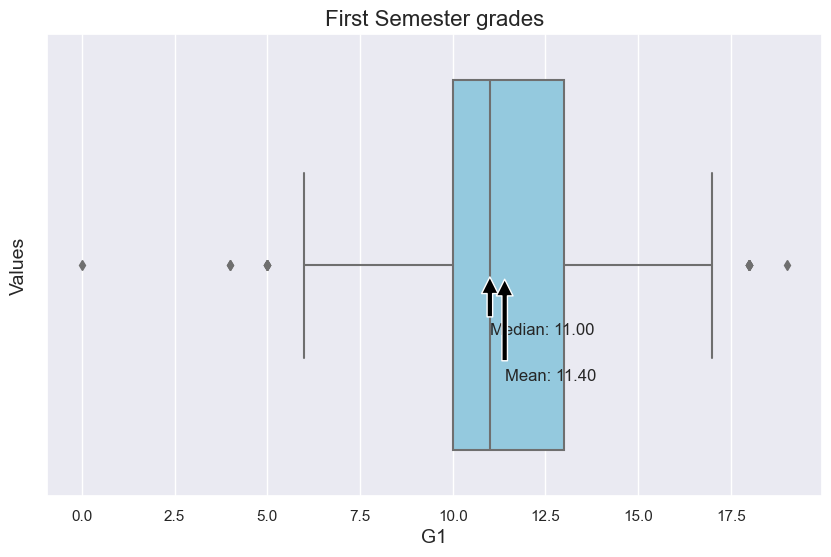

In [12]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['G1'], ax=ax, color="skyblue")
ax.set_title('First Semester grades', fontsize=16)
ax.set_xlabel('G1', fontsize=14)
ax.set_ylabel('Values', fontsize=14)

median = df['G1'].median()
mean = df['G1'].mean()
ax.annotate(f'Median: {median:.2f}', xy=(median, 0.02), xytext=(median, 0.15),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12,)
ax.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.02), xytext=(mean, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12,)

plt.show()

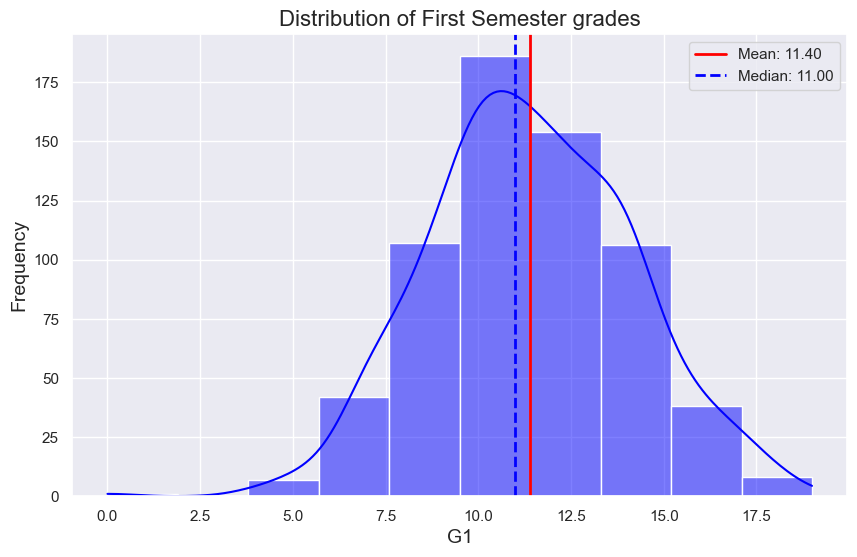

In [13]:
# Exploring with a histogram Fist Semester Grades 

median = df['G1'].median()
mean = df['G1'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(df['G1'], kde=True, color='blue', bins=10)
plt.title('Distribution of First Semester grades', fontsize=16)
plt.xlabel('G1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.legend()
plt.show()

Let's check if the second grades scores follow a similar tendency 
Exploring with a histogram Second Semester Grades

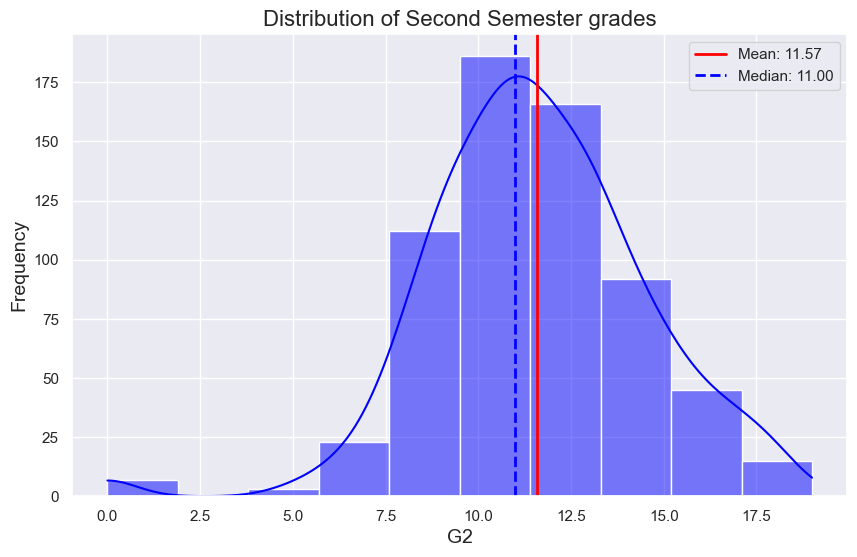

In [14]:
median = df['G2'].median()
mean = df['G2'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(df['G2'], kde=True, color='blue', bins=10)
plt.title('Distribution of Second Semester grades', fontsize=16)
plt.xlabel('G2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.legend()
plt.show()

Checking for correlations inside the data a heatmap will be done

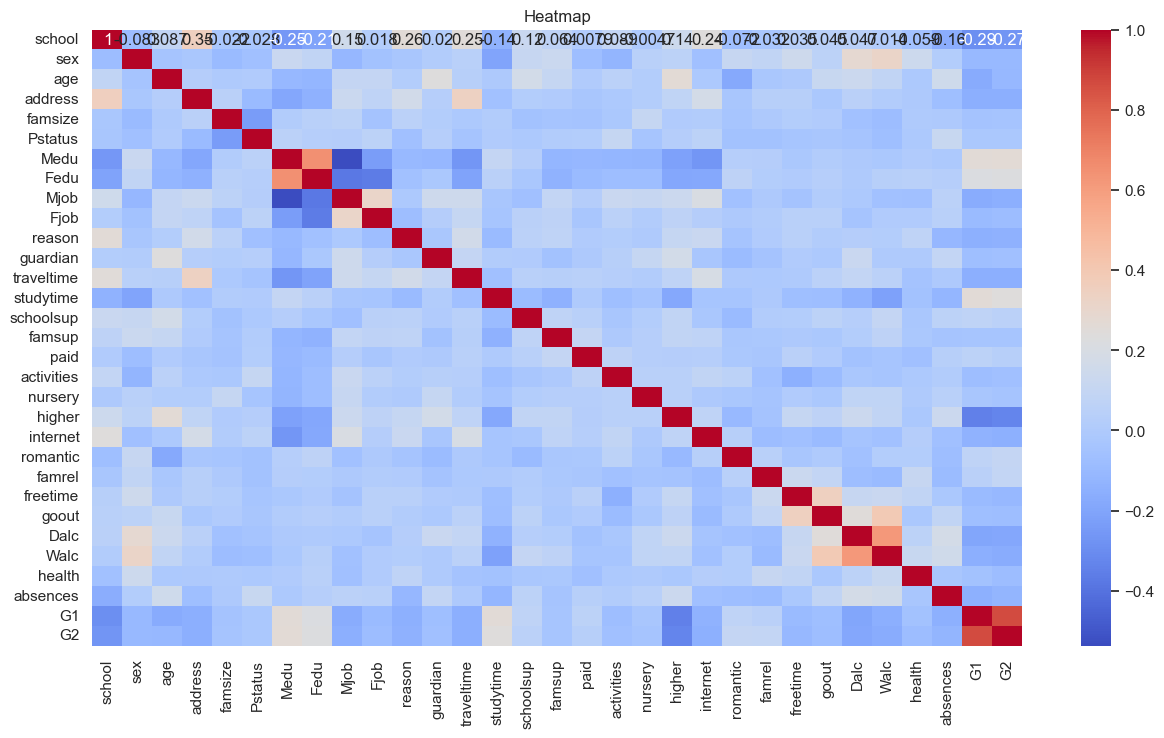

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");
plt.title("Heatmap")
plt.show()
plt.savefig('coolwarm.png')

According to the Heatmap, G1, and G2 are highly correlated, let's see these features  in a scatterplot

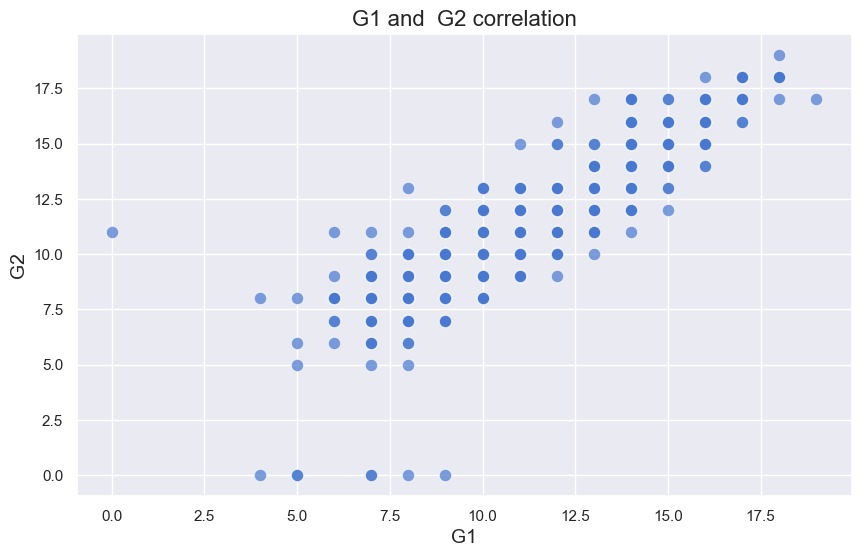

In [16]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=df['G1'], y=df['G2'], palette='viridis', s=80, alpha=0.7)
plt.title('G1 and  G2 correlation', fontsize=16)
plt.xlabel('G1', fontsize=14)
plt.ylabel('G2', fontsize=14)
plt.grid(True)
plt.show()

# Machine Learning Implementation and Evaluation

Storage of the independent variables and dependent variable 

In [17]:
X = df.iloc[:, :30]
y = df.iloc[:, 30]

In [18]:
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        0        1        1     4     4     3     0  ...   
1         0    0   17        0        1        0     1     1     3     4  ...   
2         0    0   15        0        0        0     1     1     3     4  ...   
3         0    0   15        0        1        0     4     2     1     2  ...   
4         0    0   16        0        1        0     3     3     4     4  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        1        1        0     2     3     2     4  ...   
645       1    0   18        0        0        0     3     1     0     2  ...   
646       1    0   18        0        1        0     1     1     4     4  ...   
647       1    1   17        0        0        0     3     1     2     2  ...   
648       1    1   18        1        0        0     3     2     2     4  ...   

     internet  romantic  fa

In [19]:
print(y)

0      11
1      11
2      13
3      14
4      13
       ..
644    11
645    15
646    12
647    10
648    11
Name: G2, Length: 649, dtype: int64


# Splitting Data into Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

Checking of the split was correctly done

In [21]:
X.shape, X_train.shape, X_test.shape

((649, 30), (519, 30), (130, 30))

# KNN regression model

Firstly is necesary to determinated the number of k neighbours for this model

In [22]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
neighbors = np.arange(1, 100)                  
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors)) 

In [23]:
for i, k in enumerate(neighbors):
    kNN = KNeighborsRegressor(n_neighbors=k)
    
    
    kNN.fit(X_train, y_train)
    
   
    train_accuracy[i] = kNN.score(X_train, y_train)
    test_accuracy[i] = kNN.score(X_test, y_test)


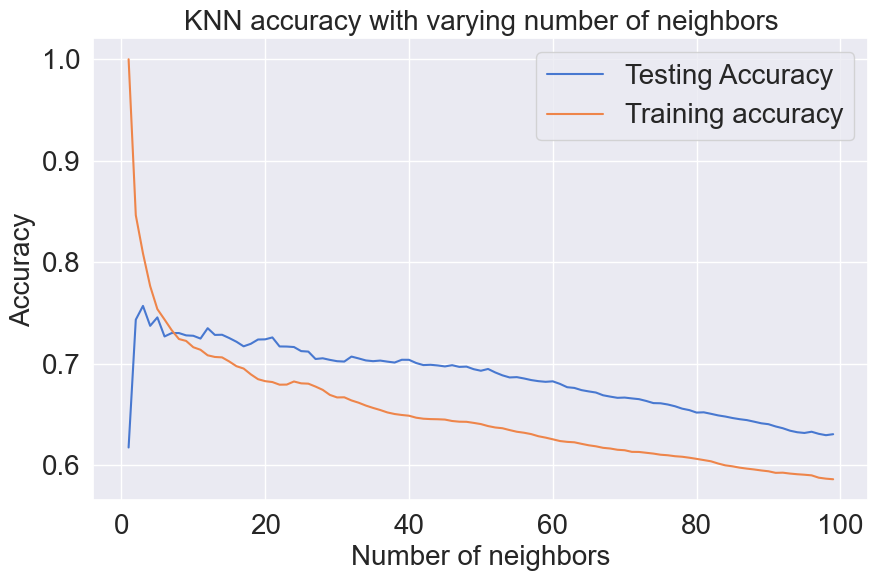

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')

plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

According to the chart, the number of K neighbors would be around 11

# KNN regressor Hyperparameter Tunning (GridSearch)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
import time

In [26]:
feature_threshold = 3
start = time.time()

grid = {'regressor__n_neighbors': list(range(3, 10)), 'regressor__weights': ['uniform', 'distance'], 'regressor__p': [1, 2]}

pipeline = Pipeline([('feature_selection', SelectKBest(k=feature_threshold)), ('regressor', KNeighborsRegressor())])

df_knn_grid = GridSearchCV(pipeline, param_grid=grid, cv=5)
df_knn_grid.fit(X_train, y_train)

end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  2.794368267059326


In [27]:
best_params_knn = df_knn_grid.best_params_
best_model_knn = df_knn_grid.best_estimator_
best_score_knn = df_knn_grid.best_score_


In [28]:
best_params_knn, best_score_knn

({'regressor__n_neighbors': 7,
  'regressor__p': 1,
  'regressor__weights': 'uniform'},
 0.6986417166058403)

After using GridSearch is possible to notice that the best number of neighbours is 7

Applying again the model with the best paramaters

In [29]:
best_model_knn.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectKBest(k=3)),
                ('regressor', KNeighborsRegressor(n_neighbors=7, p=1))])

In [30]:
y_pred_knn = best_model_knn.predict(X_test)

Calculating Error,  the R^2 score

In [31]:
print("Test set R^2: {:.2f}".format( best_model_knn.score(X_test, y_test)))

Test set R^2: 0.82


In [32]:
print("training set score: {:.2f}".format( best_model_knn.score(X_train, y_train)))
print("test set score: {:.2f}".format( best_model_knn.score(X_test, y_test)))

training set score: 0.72
test set score: 0.82


Display the test and predicted values

In [33]:
df_compare_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
df_compare_knn.head()

,Actual,Predicted
283,11,9.285714
219,9,8.857143
270,15,13.714286
178,8,7.857143
334,15,13.714286


# Cross Validation for KNN regression

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_scores = cross_val_score( best_model_knn, X, y, cv=10, scoring='r2')

for i, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

average_r2 = np.mean(cross_val_scores)
print(f"\nAverage Accuracy: {average_r2:.4f}")

Fold 1: Accuracy = 0.4196
Fold 2: Accuracy = 0.6699
Fold 3: Accuracy = 0.6563
Fold 4: Accuracy = 0.7768
Fold 5: Accuracy = 0.7616
Fold 6: Accuracy = 0.9014
Fold 7: Accuracy = 0.5916
Fold 8: Accuracy = 0.6189
Fold 9: Accuracy = 0.5141
Fold 10: Accuracy = 0.6965

Average Accuracy: 0.6607


# Linear Regression Hyperparameter Tunning (GridSearch)

Importing libraries

In [36]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [37]:
feature_threshold = 3
start = time.time()

grid_lr = {'regressor__fit_intercept': [True, False],}

pipeline = Pipeline([('feature_selection', SelectKBest(k=feature_threshold)), ('regressor', LinearRegression())])

df_lr_grid = GridSearchCV(pipeline, param_grid=grid_lr, cv=5)
df_lr_grid.fit(X_train, y_train)

end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  0.2748756408691406


In [38]:
best_params_lr = df_lr_grid.best_params_
best_model_lr = df_lr_grid.best_estimator_
best_score_lr = df_lr_grid.best_score_

In [39]:
best_params_lr, best_score_lr

({'regressor__fit_intercept': True}, 0.6940115257284303)

Applying again the model with the best paramaters

In [40]:
best_model_lr.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectKBest(k=3)),
                ('regressor', LinearRegression())])

In [41]:
print("Test set R^2: {:.2f}".format( best_model_lr.score(X_test, y_test)))

Test set R^2: 0.84


In [42]:
y_linear_pred = best_model_lr.predict(X_test)

In [43]:
print("training set R2 score: {:.2f}".format(best_model_lr.score(X_train, y_train)))
print("test set R2  score: {:.2f}".format(best_model_lr.score(X_test, y_test)))

training set R2 score: 0.72
test set R2  score: 0.84


In [44]:
df_compare_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_pred})
df_compare_lr.head()

,Actual,Predicted
283,11,9.516174
219,9,8.627530
270,15,13.959397
178,8,8.384753
334,15,13.959397


# Cross-validation for Linear regression 

In [45]:
cross_val_scores_lr = cross_val_score( best_model_lr, X, y, cv=10, scoring='r2')

for i, score in enumerate(cross_val_scores_lr, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

average_r2_lr = np.mean(cross_val_scores_lr)
print(f"\nAverage Accuracy: {average_r2_lr:.4f}")

Fold 1: Accuracy = 0.1934
Fold 2: Accuracy = 0.6815
Fold 3: Accuracy = 0.7011
Fold 4: Accuracy = 0.8318
Fold 5: Accuracy = 0.7833
Fold 6: Accuracy = 0.9086
Fold 7: Accuracy = 0.6077
Fold 8: Accuracy = 0.6924
Fold 9: Accuracy = 0.5890
Fold 10: Accuracy = 0.7420

Average Accuracy: 0.6731


In [46]:
df_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_pred})
df_compare_linear.head()

,Actual,Predicted
283,11,9.516174
219,9,8.627530
270,15,13.959397
178,8,8.384753
334,15,13.959397


# Random Forest Hyperparameter Tunnig (GridSsearchCV)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
feature_threshold = 3
start = time.time()
grid_rf = { 
    'regressor__n_estimators': [100,300,500],
    'regressor__max_features': ['sqrt'],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5],                  
    'regressor__min_samples_leaf': [1, 2],
    'regressor__random_state' : [30]
}

pipeline = Pipeline([
    ('feature_selection', SelectKBest(k=feature_threshold)),
    ('regressor', RandomForestRegressor())
])
df_grid_rf = GridSearchCV(pipeline, param_grid=grid_rf, cv=3)
df_grid_rf.fit(X_train, y_train)
end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  96.93853998184204


In [49]:
best_params_rf = df_grid_rf.best_params_
best_model_rf = df_grid_rf.best_estimator_
best_score_rf = df_grid_rf.best_score_

In [50]:
best_params_rf, best_score_rf

({'regressor__max_depth': 5,
  'regressor__max_features': 'sqrt',
  'regressor__min_samples_leaf': 1,
  'regressor__min_samples_split': 5,
  'regressor__n_estimators': 100,
  'regressor__random_state': 30},
 0.6957509820077136)

# Applying Random Forest

In [51]:
best_model_rf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectKBest(k=3)),
                ('regressor',
                 RandomForestRegressor(max_depth=5, max_features='sqrt',
                                       min_samples_split=5, random_state=30))])

In [52]:
print("Test set R^2: {:.2f}".format( best_model_rf.score(X_test, y_test)))

Test set R^2: 0.82


In [53]:
y_rf_pred = best_model_rf.predict(X_test)

In [54]:
print("training set Random Forest R2 score: {:.2f}".format(best_model_rf.score(X_train, y_train)))
print("test set Random Forest R2 score: {:.2f}".format(best_model_rf.score(X_test, y_test)))

training set Random Forest R2 score: 0.76
test set Random Forest R2 score: 0.82


In [55]:
df_compare_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred})
df_compare_rf.head()

,Actual,Predicted
283,11,9.523588
219,9,9.218773
270,15,14.261353
178,8,7.750543
334,15,14.261353


# Cross-validation for Linear regression 

In [56]:
cross_val_scores_rf = cross_val_score( best_model_rf, X, y, cv=10, scoring='r2')

for i, score in enumerate(cross_val_scores_rf, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

average_r2_rf = np.mean(cross_val_scores_rf)
print(f"\nAverage Accuracy: {average_r2_rf:.4f}")

Fold 1: Accuracy = 0.6423
Fold 2: Accuracy = 0.6839
Fold 3: Accuracy = 0.6994
Fold 4: Accuracy = 0.8411
Fold 5: Accuracy = 0.7983
Fold 6: Accuracy = 0.8946
Fold 7: Accuracy = 0.6063
Fold 8: Accuracy = 0.6591
Fold 9: Accuracy = 0.5452
Fold 10: Accuracy = 0.7074

Average Accuracy: 0.7078


# Contrast between the different models

In [57]:
print("training set score k-NN: {:.2f}".format(best_model_knn.score(X_train, y_train)))
print("test set score k-NN: {:.2f}".format(best_model_knn.score(X_test, y_test)))
print(f"\nAverage R2 Score kNN regressor: {average_r2}")
print("training set score lineal regression: {:.2f}".format(best_model_lr.score(X_train, y_train)))
print("test set score lineal regression: {:.2f}".format(best_model_lr.score(X_test, y_test)))
print(f"\nAverage R2 Score linear regression: {average_r2_lr}")
print("training set Random Forest R2 score: {:.2f}".format(best_model_rf.score(X_train, y_train)))
print("test set Random Forest R2 score: {:.2f}".format(best_model_rf.score(X_test, y_test)))
print(f"\nAverage Score Random Forest: {average_r2_rf:.4f}")

training set score k-NN: 0.72
test set score k-NN: 0.82

Average R2 Score kNN regressor: 0.6606548199196565
training set score lineal regression: 0.72
test set score lineal regression: 0.84

Average R2 Score linear regression: 0.6730871563719549
training set Random Forest R2 score: 0.76
test set Random Forest R2 score: 0.82

Average Score Random Forest: 0.7078


Random forest has the best accuracy and it does not look any overfitting or underfitting symtpons

# SHAP: Checking which variables have the greatest impact on the prediction

In [58]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [60]:
import shap

In [62]:
best_model_rf = df_grid_rf.best_estimator_.named_steps['regressor']

In [63]:
best_features = shap.Explainer(best_model_rf,X_train)
values_SHAP = best_features(X_train)

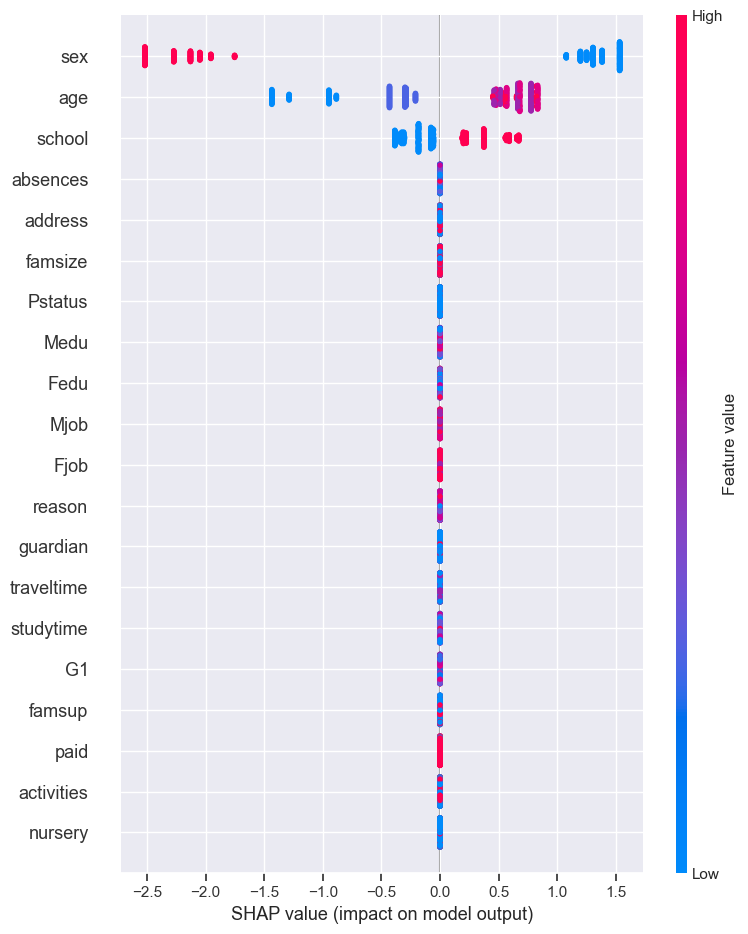

In [65]:
shap.summary_plot(values_SHAP, X_train)